<a href="https://colab.research.google.com/github/gxs43670/neural-networks/blob/main/NNDL_Programming_quiz__700744367_ganesh_karthik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape( -1, 28, 28, 1) / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential( [Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)),
                     MaxPooling2D((2,2)),
                     Conv2D(64, (3,3), activation = 'relu'),
                     MaxPooling2D((2,2)),
                     Flatten(),
                     Dense(64, activation = 'relu'),
                     Dense(10, activation = 'softmax')
])

model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy',metrics= ['accuracy'])

In [3]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 41s 21ms/step - loss: 0.1402 - accuracy: 0.9569 - val_loss: 0.0494 - val_accuracy: 0.9847
Epoch 2/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0464 - accuracy: 0.9851 - val_loss: 0.0378 - val_accuracy: 0.9878
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0331 - accuracy: 0.9894 - val_loss: 0.0320 - val_accuracy: 0.9900
Epoch 4/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0248 - accuracy: 0.9924 - val_loss: 0.0307 - val_accuracy: 0.9904
Epoch 5/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0188 - accuracy: 0.9939 - val_loss: 0.0329 - val_accuracy: 0.9884


In [4]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("test accuracy: ", test_accuracy )

313/313 [==============================] - 2s 5ms/step - loss: 0.0329 - accuracy: 0.9884
test accuracy:  0.9883999824523926


In [7]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def create_mod(optimizer='adam'):
  model = Sequential([
      Conv2D(32, (3,3), activation= 'relu', input_shape=(28, 28, 1)),
      MaxPooling2D((2,2)),
      Conv2D(64, (3,3), activation = 'relu'),
      MaxPooling2D((2,2)),
       Flatten(),
      Dense(64, activation = 'relu'),
      Dense(10, activation = 'softmax')
  ])


  model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy',metrics= ['accuracy'])
  return model


param_grid = {
    'batch_size': [32,64],
    'epochs' : [5,10],
    'optimizers' : ['adam', 'rmsprop']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

grid_search_result = grid_search.fit(X_train, y_train)

best_params = grid_search_result.best_params_
best_model = grid_search_result.best_estimator_.model


test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print("Best model test accuracy:", test_accuracy)

ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

In [8]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)


history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), callbacks=[reduce_lr])


Epoch 1/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0136 - accuracy: 0.9954 - val_loss: 0.0358 - val_accuracy: 0.9883 - lr: 0.0010
Epoch 2/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0105 - accuracy: 0.9965 - val_loss: 0.0361 - val_accuracy: 0.9905 - lr: 0.0010
Epoch 3/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0092 - accuracy: 0.9970 - val_loss: 0.0359 - val_accuracy: 0.9898 - lr: 0.0010
Epoch 4/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0087 - accuracy: 0.9971 - val_loss: 0.0338 - val_accuracy: 0.9910 - lr: 0.0010
Epoch 5/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0074 - accuracy: 0.9974 - val_loss: 0.0336 - val_accuracy: 0.9915 - lr: 0.0010


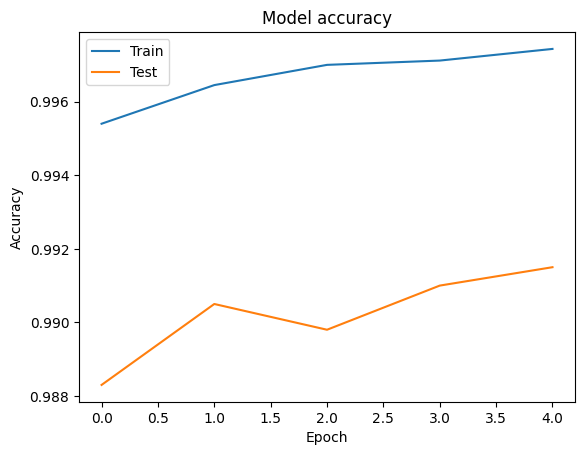

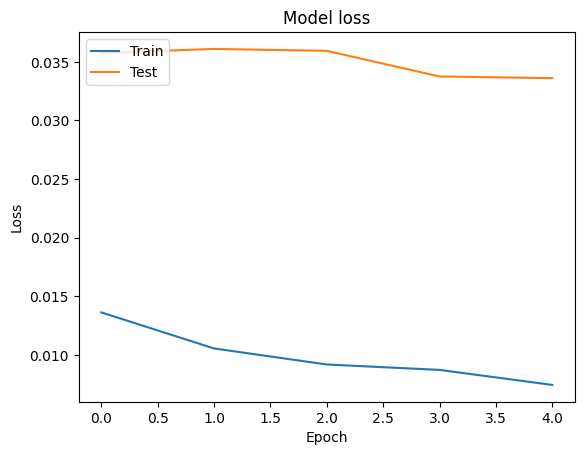

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.callbacks import ReduceLROnPlateau



vocab_size = 10000
max_length = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = vocab_size)
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)

model = Sequential([
    Embedding(vocab_size, 32, input_length=max_length),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)


history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), callbacks=[reduce_lr])


loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)


import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


17464789/17464789 [==============================] - 0s 0us/step


NameError: name 'Embedding' is not defined